# Imports


In [64]:
import warnings
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

In [50]:
warnings.simplefilter(action="ignore")

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables) 

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

# Cleaning


In [3]:
# Check first 5 records of the features dataframe
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [4]:
#check all distinct values in marital status
X["marital-status"].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [5]:
#Check shape of the features
X.shape

(48842, 14)

In [6]:
# check all distinc value in relationship
X.relationship.unique()

array(['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
       'Other-relative'], dtype=object)

In [7]:
#check for the unique values in target
y["income"].unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

In [8]:
#Check all keys in adult data dictionary
adult.data.keys()

dict_keys(['ids', 'features', 'targets', 'original', 'headers'])

In [9]:
#assign the combination of target and features to df
df = adult.data.original

In [10]:
# Check for the number of rows and columns in df
df.shape

(48842, 15)

In [11]:
#Check for number of duplicates
df.duplicated().sum()

29

In [12]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [13]:
#Confirm duplicates were dropped
df.duplicated().sum()

0

In [14]:
#Confirm the current shape of data frame
df.shape

(48813, 15)

In [15]:
#check for each column info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48813 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48813 non-null  int64 
 1   workclass       47850 non-null  object
 2   fnlwgt          48813 non-null  int64 
 3   education       48813 non-null  object
 4   education-num   48813 non-null  int64 
 5   marital-status  48813 non-null  object
 6   occupation      47847 non-null  object
 7   relationship    48813 non-null  object
 8   race            48813 non-null  object
 9   sex             48813 non-null  object
 10  capital-gain    48813 non-null  int64 
 11  capital-loss    48813 non-null  int64 
 12  hours-per-week  48813 non-null  int64 
 13  native-country  48539 non-null  object
 14  income          48813 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [16]:
#Drop all rows with null values
df.dropna(inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47592 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             47592 non-null  int64 
 1   workclass       47592 non-null  object
 2   fnlwgt          47592 non-null  int64 
 3   education       47592 non-null  object
 4   education-num   47592 non-null  int64 
 5   marital-status  47592 non-null  object
 6   occupation      47592 non-null  object
 7   relationship    47592 non-null  object
 8   race            47592 non-null  object
 9   sex             47592 non-null  object
 10  capital-gain    47592 non-null  int64 
 11  capital-loss    47592 non-null  int64 
 12  hours-per-week  47592 non-null  int64 
 13  native-country  47592 non-null  object
 14  income          47592 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.8+ MB


In [18]:
# display all categorical columns
cat_cols = list(df.select_dtypes("object"))
cat_cols

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'income']

In [19]:
# confirm there's no repetition with difference in cases in values
for col in cat_cols:
    print(f"{col}: {df[col].unique()}\n")

workclass: ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

education: ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

marital-status: ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

occupation: ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']

relationship: ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']

race: ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']

sex: ['Male' 'Female']

native-country: ['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'Eng

In [20]:
# display all columns that has "?" represeting null
null_col = list()
for col in cat_cols:
    if "?" in list(df[col].unique()):
        null_col.append(col)
        
null_col

['workclass', 'occupation', 'native-country']

In [21]:
# check amount of all rows with "?"
for col in null_col:
    print(len(df[df[col] == "?"]))

1836
1843
582


In [22]:
# drop all rows with "?"
df.replace("?", np.nan, inplace=True)

In [23]:
df.dropna(inplace=True)

In [24]:
df.shape

(45194, 15)

In [25]:
df.select_dtypes("number").describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,45194.000000,4.519400e+04,45194.000000,45194.000000,45194.000000,45194.000000
mean,38.551755,1.897379e+05,10.119109,1102.112736,88.650308,40.941209
std,13.215806,1.056407e+05,2.552057,7508.705003,405.075515,12.006449
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173922e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783120e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.379030e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [26]:
df.drop(columns=["fnlwgt", "education-num"], inplace=True)

# EDA

<AxesSubplot:>

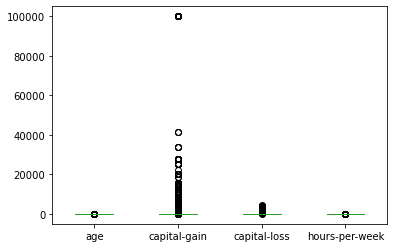

In [27]:
df.select_dtypes("number").plot(kind="box")

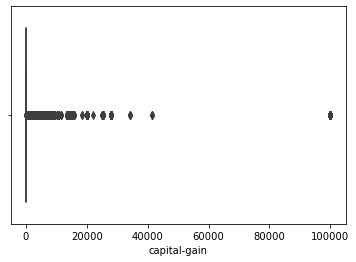

In [28]:
#check outlier in capital-gain
sns.boxplot(x = df["capital-gain"]);

In [29]:
df["capital-gain"].describe()

count    45194.000000
mean      1102.112736
std       7508.705003
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64

In [30]:
# Check for amount of values that are zero in capital gain
len(df[df["capital-gain"] == 0])

41404

In [31]:
#drop both capital gain and capital loss columns
df.drop(columns=["capital-gain", "capital-loss"], inplace=True)

<AxesSubplot:>

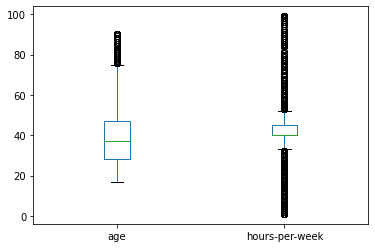

In [32]:
# Check diatribution of other numeric columns
df.select_dtypes("number").plot(kind="box");

In [33]:
#Check age distribution
df["age"].describe()

count    45194.000000
mean        38.551755
std         13.215806
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64

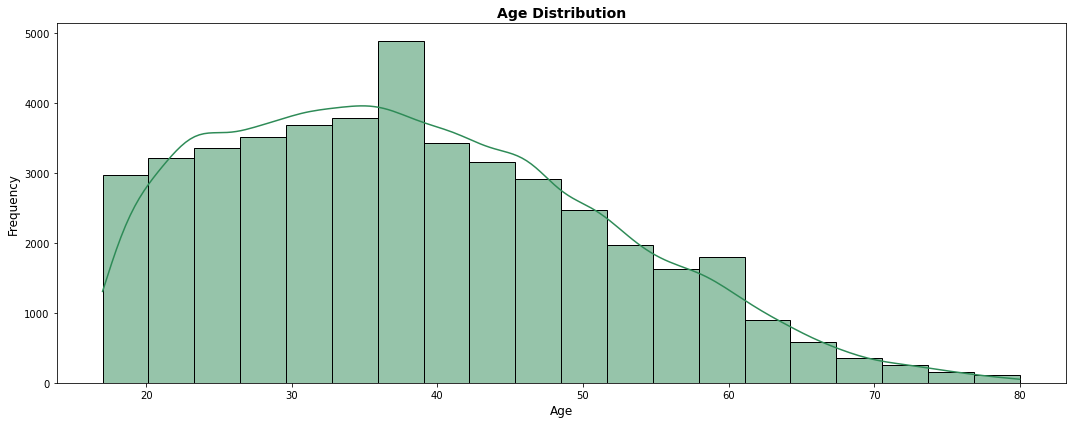

In [93]:
# plot histogram plot to visualize age distribution
plt.figure(figsize=(15, 6))
sns.histplot(df["age"], kde=True, color='seagreen', bins=20)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Age Distribution", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [37]:
# limit age to 80 years
df = df[df["age"] <= 80]

In [42]:
# edit the target (income) column
df["income"].str.replace(".","", regex=False).unique()

array(['<=50K', '>50K'], dtype=object)

In [51]:
df["income"] = df["income"].str.replace(".","", regex=False)

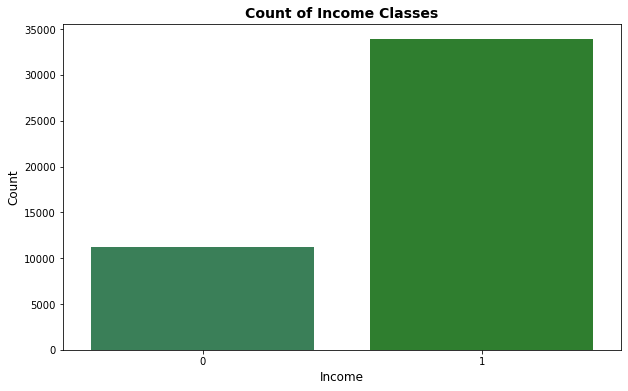

In [96]:
# bar chart to check distribution of income
target_counts = df['income'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=target_counts.index, y=target_counts.values, palette=["seagreen", "forestgreen"])
plt.title('Count of Income Classes', fontsize=14, fontweight='bold')
plt.xlabel('Income', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


In [90]:
# turn target column to binary column
income_map = {"<=50K":1, ">50K":0}
df["income"] = df["income"].map(income_map)

In [53]:
# check for multicollinearity
df.select_dtypes("number").corr()

,age,hours-per-week
age,1.000000,0.109879
hours-per-week,0.109879,1.000000


In [61]:
# check if there are columns with high and low cardinality
df.select_dtypes("object").nunique()

workclass          7
education         16
marital-status     7
occupation        14
relationship       6
race               5
sex                2
native-country    41
income             2
dtype: int64

In [62]:
df.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
